## Text Vectorization

In [45]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('dataset/final_cleaned.csv', usecols=['cleaned_text', 'sentiment'])
df.shape

(60000, 2)

In [3]:
df.head()

,sentiment,cleaned_text
0,1,sixteen year old border collie love food shes ...
1,1,bought pb pb chocolateand completely wonderful...
2,1,boyfriend love pancake always think different ...
3,1,mix three tablespoon morning smoothie protein ...
4,1,family love taco night dont make often enough ...


## Distribution of reviews length after cleaning

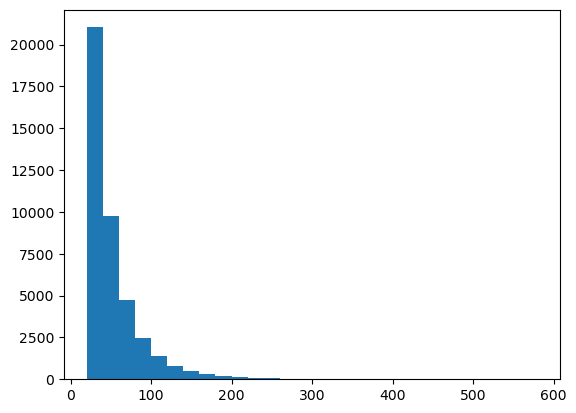

In [13]:
bins = [20*i for i in range(1, 30)]
plt.hist([len(s.split()) for s in df['cleaned_text']], bins=bins)
plt.show()

### Plotting average word cound in our cleaned text according to its sentiment

In [24]:
positive_avg = df[df['sentiment'] ==1]['cleaned_text'].str.len().mean()
negetive_avg = df[df['sentiment'] ==0]['cleaned_text'].str.len().mean()

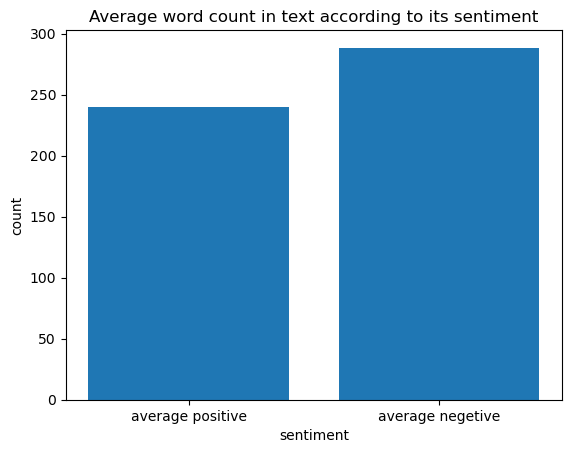

In [38]:
plt.bar(x=['average positive', 'average negetive'],height=[positive_avg,negetive_avg])
plt.title('Average word count in text according to its sentiment')
plt.ylabel('count')
plt.xlabel('sentiment')

plt.show()

### Using wordcloud to display top words in out corpus 

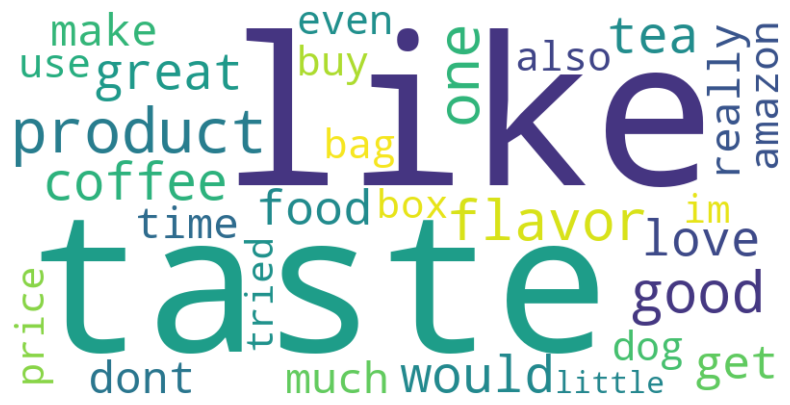

In [48]:
# /home/rojit/ubuntu/.

text = ' '.join(df['cleaned_text'])
tokens = word_tokenize(text)

word_frequencies = {}
for token in tokens:
    if token in word_frequencies:
        word_frequencies[token] += 1
    else:
        word_frequencies[token] = 1

sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

top_k = 30
top_k_words = dict(sorted_word_frequencies[:top_k])

wordcloud = WordCloud(width=800, height=400, background_color='white')

wordcloud.generate_from_frequencies(top_k_words)

# showing the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Bag of words

In [57]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['cleaned_text'])

In [58]:
bow.get_shape()

(60000, 59947)

In [59]:
bow

<60000x59947 sparse matrix of type '<class 'numpy.int64'>'
	with 2014919 stored elements in Compressed Sparse Row format>

In [60]:
# our first 50 feature names after applying bow
vectorizer.get_feature_names_out()[:50]

array(['aa', 'aaah', 'aadmit', 'aadp', 'aafco', 'aafes',
       'aakaufmanerthlinknet', 'aamazoni', 'aap', 'aarthur', 'aaworld',
       'ab', 'aback', 'abalone', 'abandon', 'abandoned', 'abandoning',
       'abated', 'abbaye', 'abbazabba', 'abbey', 'abbott', 'abbreviated',
       'abbreviating', 'abby', 'abc', 'abcstores', 'abctoyme', 'abd',
       'abdomen', 'abdominal', 'aber', 'aberdeen', 'aberrant',
       'aberration', 'abet', 'abetter', 'abfab', 'abhor', 'abhorrent',
       'abi', 'abide', 'abides', 'abietate', 'abigirl', 'ability', 'abit',
       'abject', 'ablation', 'able'], dtype=object)

In [61]:
vectorizer.vocabulary_

{'sixteen': 47646,
 'year': 59390,
 'old': 36362,
 'border': 5679,
 'collie': 10399,
 'love': 30398,
 'food': 19933,
 'shes': 46945,
 'used': 56285,
 'dry': 15862,
 'dog': 15184,
 'started': 49744,
 'mixing': 33026,
 'eats': 16239,
 'heartily': 23992,
 'really': 42665,
 'woof': 58894,
 'give': 21692,
 'plain': 39527,
 'usually': 56349,
 'mixed': 33002,
 'definitely': 13465,
 'doggie': 15199,
 'friendly': 20624,
 'well': 57959,
 'nutritionally': 35750,
 'excelent': 17719,
 'bought': 5793,
 'pb': 38394,
 'chocolateand': 9281,
 'completely': 10736,
 'wonderful': 58831,
 'astounded': 2907,
 'tasty': 52245,
 'product': 41118,
 'add': 409,
 'peanut': 38449,
 'butter': 6889,
 'protein': 41452,
 'powder': 40357,
 'yogurtsetc': 59568,
 'calorie': 7283,
 'content': 11227,
 'often': 36190,
 'high': 24388,
 'total': 54219,
 'snack': 48177,
 'allows': 1303,
 'enjoy': 17002,
 'along': 1389,
 'fraction': 20317,
 'sacrifice': 45099,
 'taste': 52076,
 'thick': 53174,
 'consistency': 11097,
 'regular': 

####  getting vector representation of our first text review

In [62]:
vectorizer.transform([df['cleaned_text'][0]]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [81]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [82]:
# we can again get the features names as we did with bag of words
tfidf_vectorizer.get_feature_names_out()[:50]

array(['aa', 'aaah', 'aadmit', 'aadp', 'aafco', 'aafes',
       'aakaufmanerthlinknet', 'aamazoni', 'aap', 'aarthur', 'aaworld',
       'ab', 'aback', 'abalone', 'abandon', 'abandoned', 'abandoning',
       'abated', 'abbaye', 'abbazabba', 'abbey', 'abbott', 'abbreviated',
       'abbreviating', 'abby', 'abc', 'abcstores', 'abctoyme', 'abd',
       'abdomen', 'abdominal', 'aber', 'aberdeen', 'aberrant',
       'aberration', 'abet', 'abetter', 'abfab', 'abhor', 'abhorrent',
       'abi', 'abide', 'abides', 'abietate', 'abigirl', 'ability', 'abit',
       'abject', 'ablation', 'able'], dtype=object)

## Training our tfidf vector representation with logistic regression and random forest classifier

In [83]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['sentiment'], test_size=0.2, random_state=42)

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\rojit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = clf.predict(X_test)

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8678333333333333


#### Logictic regression classification report 

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6091
           1       0.87      0.86      0.86      5909

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [87]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
pred_rf = rf.predict(X_test)

In [91]:
rf_accuracy = accuracy_score(y_test, pred_rf)
rf_accuracy

0.8474166666666667

In [92]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      6091
           1       0.86      0.82      0.84      5909

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Confusion matrix for Logostic regression

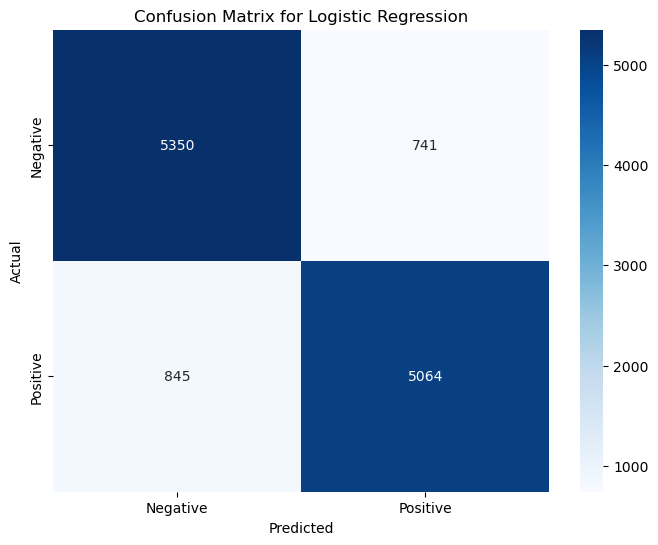

In [101]:
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Confusion matrix for Random Forest

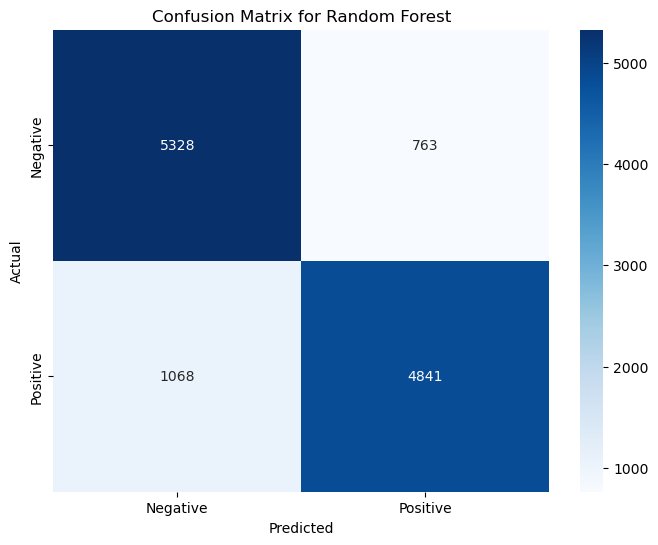

In [99]:
cm_rf = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()